In [1]:
import pyspark
import pyspark.sql.functions as func
sc = pyspark.SparkContext('local[*]')
sqlContext = pyspark.sql.SQLContext(sc)

In [2]:
people = sqlContext.read.json('../data/people.json')

In [3]:
people.printSchema()

root
 |-- age: long (nullable = true)
 |-- children: long (nullable = true)
 |-- gender: string (nullable = true)
 |-- name: string (nullable = true)
 |-- surname: string (nullable = true)



In [4]:
people.show()

+---+--------+------+-----+-------+
|age|children|gender| name|surname|
+---+--------+------+-----+-------+
| 25|       2|  male| John|    Doe|
| 35|       0|  male| Mike|    Foo|
| 65|       1|female|  Liz|    Bar|
| 34|       3|female|Emily|    Doe|
+---+--------+------+-----+-------+



In [5]:
people.select('name').show()

+-----+
| name|
+-----+
| John|
| Mike|
|  Liz|
|Emily|
+-----+



In [11]:
people.where(people.age > 30).where( people.age<60).show()

+---+--------+------+-----+-------+
|age|children|gender| name|surname|
+---+--------+------+-----+-------+
| 35|       0|  male| Mike|    Foo|
| 34|       3|female|Emily|    Doe|
+---+--------+------+-----+-------+



In [12]:
people.groupBy('gender').agg(func.avg('age').alias('avg_age'), func.max('children').alias('max_children')).show()

+------+-------+------------+
|gender|avg_age|max_children|
+------+-------+------------+
|female|   49.5|           3|
|  male|   30.0|           2|
+------+-------+------------+



In [13]:
people.groupBy('gender').pivot('name').agg(func.avg('age')).show()

+------+-----+----+----+----+
|gender|Emily|John| Liz|Mike|
+------+-----+----+----+----+
|female| 34.0|null|65.0|null|
|  male| null|25.0|null|35.0|
+------+-----+----+----+----+



In [16]:
people.registerTempTable('people')
# Won't work
#sqlContext.sql("SELECT name, surname, MAX(age) as maxAge FROM people WHERE gender = 'male'").show()
sqlContext.sql("SELECT 'name' as name, 'surname', MAX('age') as maxAge FROM people WHERE gender = 'male'").show()

+----+-------+------+
|name|    _c1|maxAge|
+----+-------+------+
|name|surname|   age|
+----+-------+------+



In [17]:
people.where(people.gender == 'male') \
    .select(
        func.first('name').alias('name'), 
        func.first('surname').alias('surname'), 
        func.max('age').alias('maxAge')) \
    .show()

+----+-------+------+
|name|surname|maxAge|
+----+-------+------+
|John|    Doe|    35|
+----+-------+------+



In [18]:
import matplotlib
%matplotlib inline

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


,avg_age,max_children
gender,,
female,49.5,3
male,30.0,2


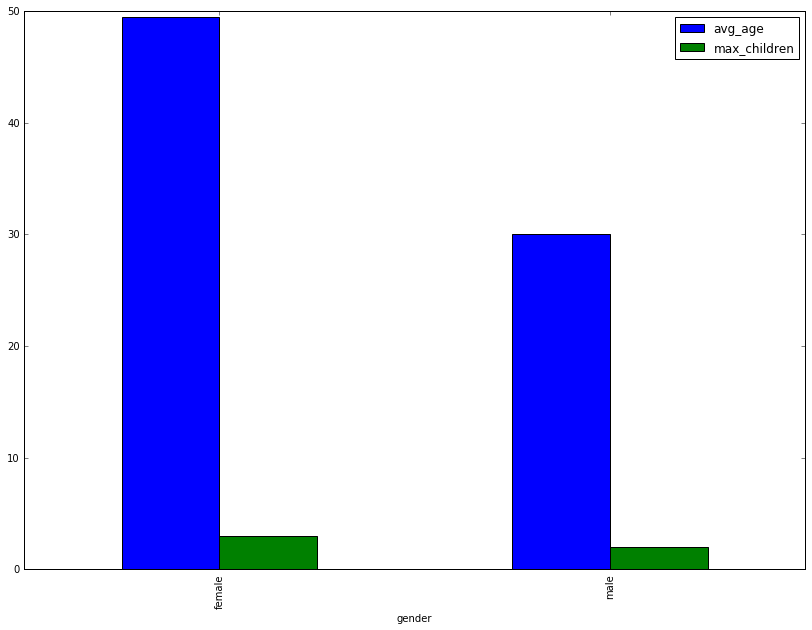

In [21]:
p = people.groupBy('gender').agg(func.avg('age').alias('avg_age'), func.max('children').alias('max_children')) \
        .toPandas().set_index('gender')
p.plot(kind='bar', figsize=(14,10))
p